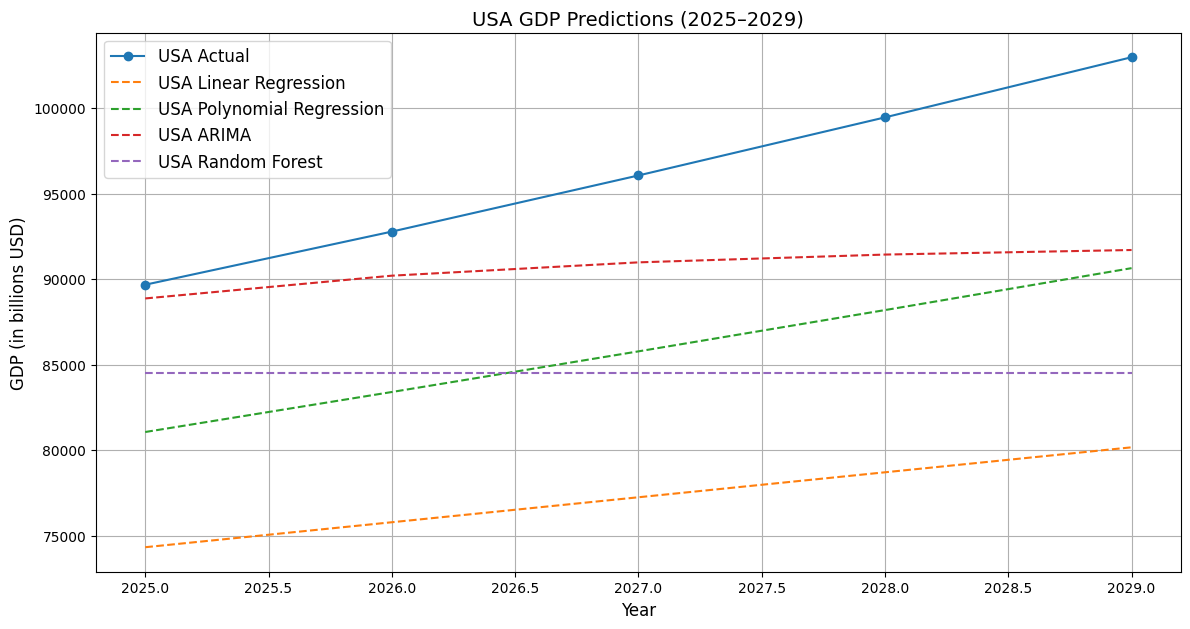

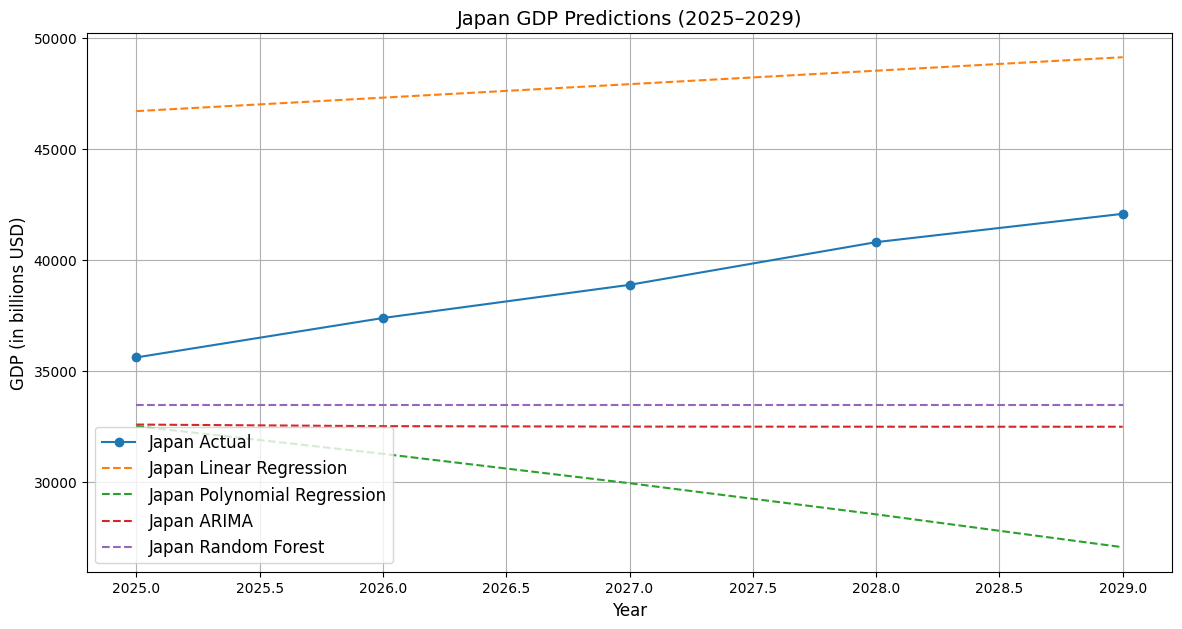

USA Mean Squared Error:
Linear Regression: 366210129.9710596
Polynomial Regression: 109496072.39176175
ARIMA: 44944593.27468676
Random Forest: 158150081.7263995

Japan Mean Squared Error:
Linear Regression: 82717499.39309558
Polynomial Regression: 100761490.84722413
ARIMA: 47047694.35183465
Random Forest: 35376803.78754151


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load and clean data
file_path = 'Final.csv'
data = pd.read_csv(file_path)
data.replace('no data', None, inplace=True)
data = data[['Year', 'United States', 'Japan']].dropna()
data['United States'] = pd.to_numeric(data['United States'], errors='coerce')
data['Japan'] = pd.to_numeric(data['Japan'], errors='coerce')
data['Year'] = data['Year'].astype(int)
data = data.dropna()

# Split into training (1980-2024) and validation (2025-2029)
train_data = data[data['Year'] <= 2024]
valid_data = data[data['Year'] > 2024]

# Features and target
X_train = train_data[['Year']]
y_train_usa = train_data['United States']
y_train_japan = train_data['Japan']
X_valid = valid_data[['Year']]
y_valid_usa = valid_data['United States']
y_valid_japan = valid_data['Japan']

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train_usa)
pred_lr_usa = lr.predict(X_valid)
lr.fit(X_train, y_train_japan)
pred_lr_japan = lr.predict(X_valid)

# 2. Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.transform(X_valid)
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train_usa)
pred_poly_usa = lr_poly.predict(X_valid_poly)
lr_poly.fit(X_train_poly, y_train_japan)
pred_poly_japan = lr_poly.predict(X_valid_poly)

# 3. ARIMA (USA)
arima_usa = ARIMA(train_data['United States'], order=(1, 1, 0))
arima_usa_fit = arima_usa.fit()
pred_arima_usa = arima_usa_fit.forecast(steps=len(valid_data))

# ARIMA (Japan)
arima_japan = ARIMA(train_data['Japan'], order=(1, 1, 0))
arima_japan_fit = arima_japan.fit()
pred_arima_japan = arima_japan_fit.forecast(steps=len(valid_data))

# 4. Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train_usa)
pred_rf_usa = rf.predict(X_valid)
rf.fit(X_train, y_train_japan)
pred_rf_japan = rf.predict(X_valid)

# Combine predictions into a DataFrame
predictions = pd.DataFrame({
    'Year': valid_data['Year'],
    'USA_LR': pred_lr_usa,
    'Japan_LR': pred_lr_japan,
    'USA_Poly': pred_poly_usa,
    'Japan_Poly': pred_poly_japan,
    'USA_ARIMA': pred_arima_usa,
    'Japan_ARIMA': pred_arima_japan,
    'USA_RF': pred_rf_usa,
    'Japan_RF': pred_rf_japan,
    'USA_Actual': y_valid_usa.values,
    'Japan_Actual': y_valid_japan.values
})

# Evaluate and Plot Results
plt.figure(figsize=(14, 7))
plt.plot(valid_data['Year'], y_valid_usa, label='USA Actual', marker='o')
plt.plot(valid_data['Year'], pred_lr_usa, label='USA Linear Regression', linestyle='--')
plt.plot(valid_data['Year'], pred_poly_usa, label='USA Polynomial Regression', linestyle='--')
plt.plot(valid_data['Year'], pred_arima_usa, label='USA ARIMA', linestyle='--')
plt.plot(valid_data['Year'], pred_rf_usa, label='USA Random Forest', linestyle='--')
plt.title('USA GDP Predictions (2025–2029)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(valid_data['Year'], y_valid_japan, label='Japan Actual', marker='o')
plt.plot(valid_data['Year'], pred_lr_japan, label='Japan Linear Regression', linestyle='--')
plt.plot(valid_data['Year'], pred_poly_japan, label='Japan Polynomial Regression', linestyle='--')
plt.plot(valid_data['Year'], pred_arima_japan, label='Japan ARIMA', linestyle='--')
plt.plot(valid_data['Year'], pred_rf_japan, label='Japan Random Forest', linestyle='--')
plt.title('Japan GDP Predictions (2025–2029)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print Evaluation Metrics
print("USA Mean Squared Error:")
print("Linear Regression:", mean_squared_error(y_valid_usa, pred_lr_usa))
print("Polynomial Regression:", mean_squared_error(y_valid_usa, pred_poly_usa))
print("ARIMA:", mean_squared_error(y_valid_usa, pred_arima_usa))
print("Random Forest:", mean_squared_error(y_valid_usa, pred_rf_usa))

print("\nJapan Mean Squared Error:")
print("Linear Regression:", mean_squared_error(y_valid_japan, pred_lr_japan))
print("Polynomial Regression:", mean_squared_error(y_valid_japan, pred_poly_japan))
print("ARIMA:", mean_squared_error(y_valid_japan, pred_arima_japan))
print("Random Forest:", mean_squared_error(y_valid_japan, pred_rf_japan))


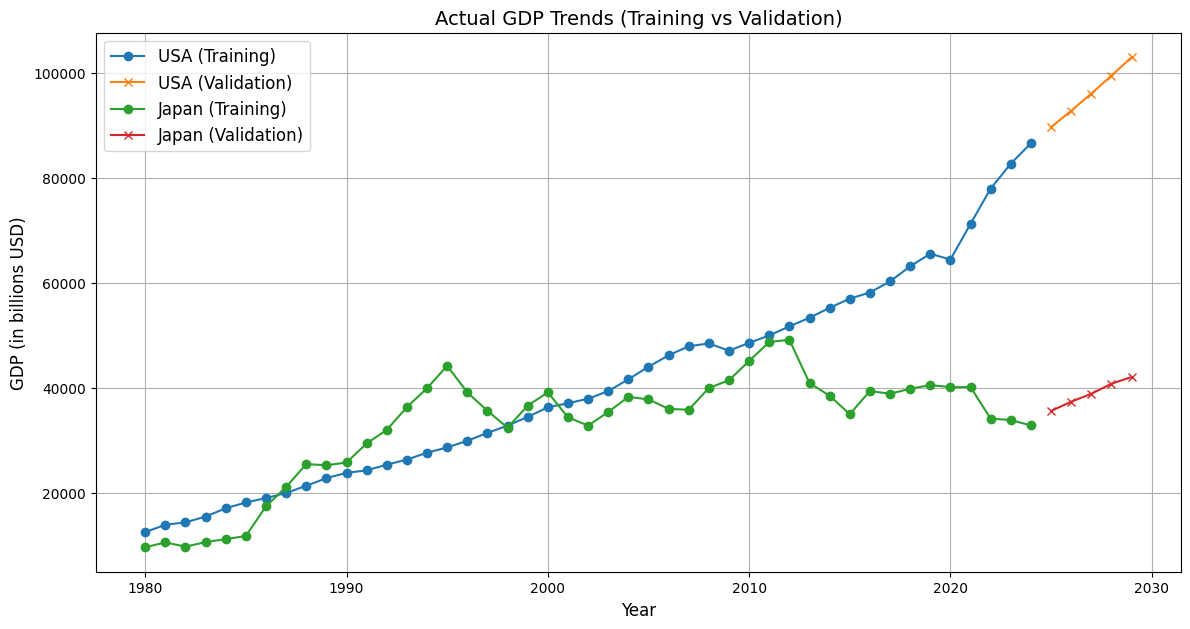

In [3]:
# Actual GDP Trends (Training vs Validation)
plt.figure(figsize=(14, 7))
plt.plot(train_data['Year'], train_data['United States'], label='USA (Training)', marker='o')
plt.plot(valid_data['Year'], valid_data['United States'], label='USA (Validation)', marker='x')
plt.plot(train_data['Year'], train_data['Japan'], label='Japan (Training)', marker='o')
plt.plot(valid_data['Year'], valid_data['Japan'], label='Japan (Validation)', marker='x')
plt.title('Actual GDP Trends (Training vs Validation)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


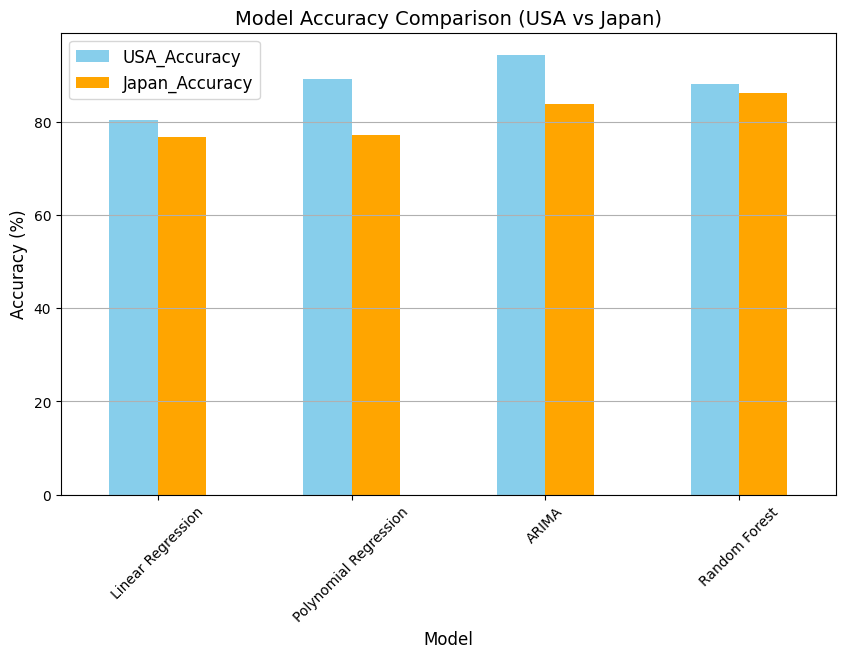

In [4]:
# Model Accuracy Comparison
accuracy_df.set_index('Model')[['USA_Accuracy', 'Japan_Accuracy']].plot(
    kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Model Accuracy Comparison (USA vs Japan)', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(axis='y')
plt.show()


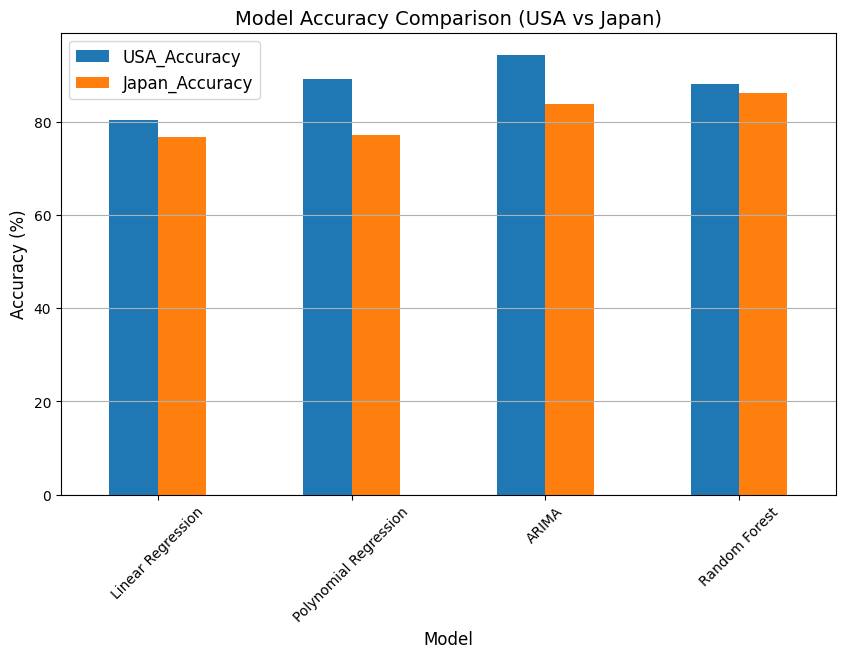

In [8]:
# Model Accuracy Comparison
accuracy_df.set_index('Model')[['USA_Accuracy', 'Japan_Accuracy']].plot(
    kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])  # Blue for USA, Orange for Japan
plt.title('Model Accuracy Comparison (USA vs Japan)', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(axis='y')
plt.show()


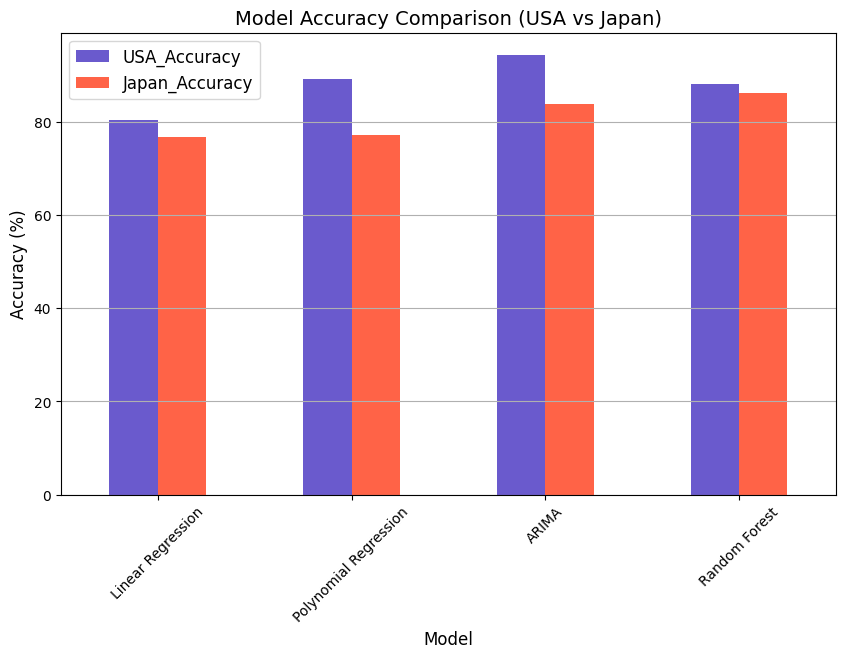

In [9]:
# Model Accuracy Comparison
accuracy_df.set_index('Model')[['USA_Accuracy', 'Japan_Accuracy']].plot(
    kind='bar', figsize=(10, 6), color=['#6a5acd', '#ff6347'])  # Purple for USA, Tomato red for Japan
plt.title('Model Accuracy Comparison (USA vs Japan)', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(axis='y')
plt.show()


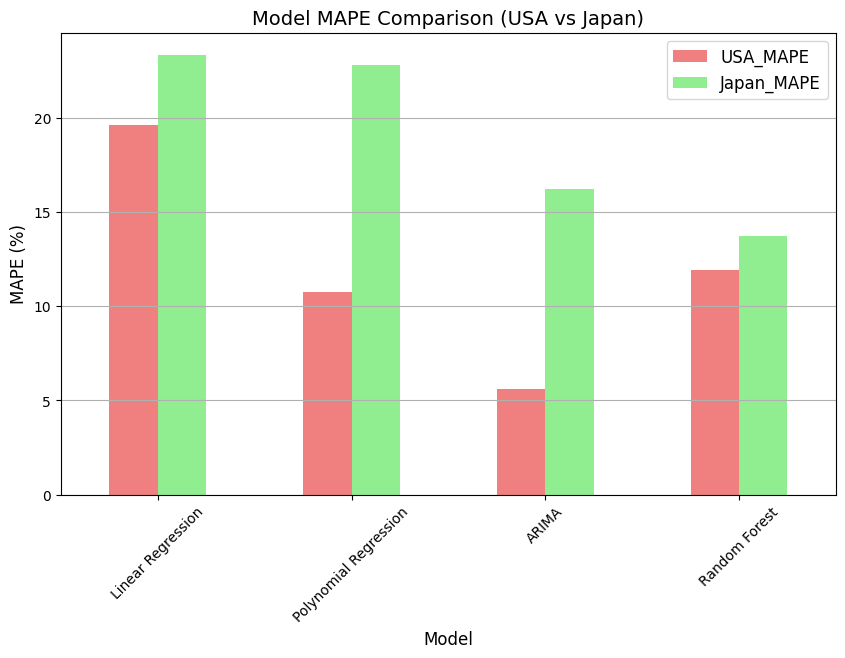

In [5]:
# Model MAPE Comparison
accuracy_df.set_index('Model')[['USA_MAPE', 'Japan_MAPE']].plot(
    kind='bar', figsize=(10, 6), color=['lightcoral', 'lightgreen'])
plt.title('Model MAPE Comparison (USA vs Japan)', fontsize=14)
plt.ylabel('MAPE (%)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(axis='y')
plt.show()


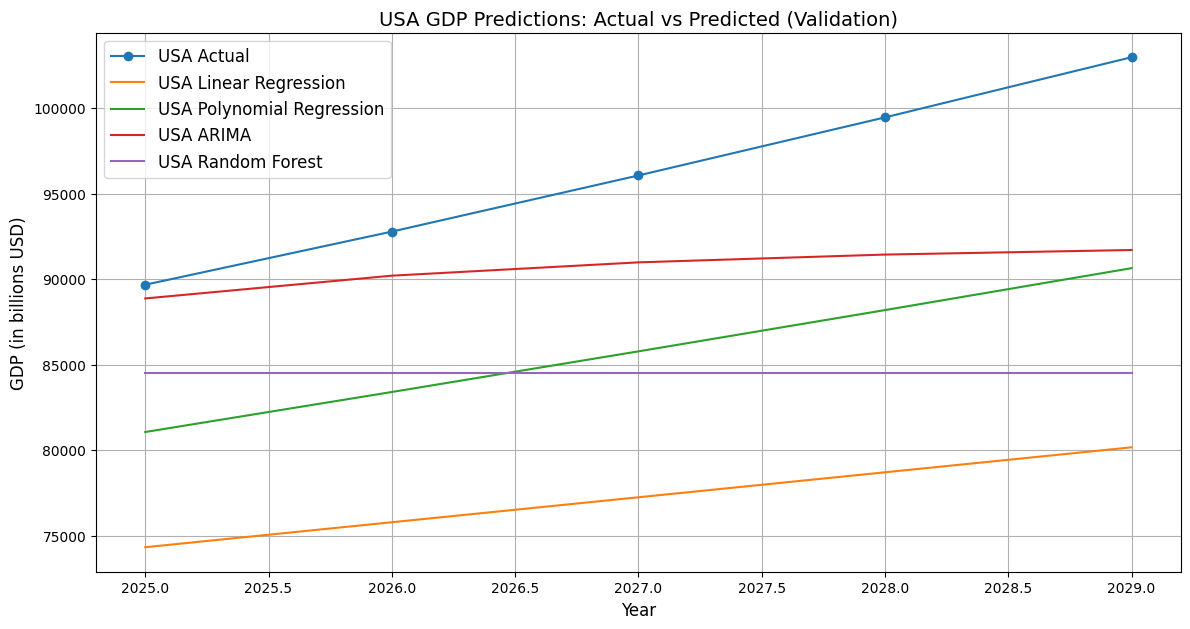

In [6]:
# USA GDP Predictions (Validation)
plt.figure(figsize=(14, 7))
plt.plot(valid_data['Year'], y_valid_usa, label='USA Actual', marker='o')
for model, usa_pred in zip(models, [pred_lr_usa, pred_poly_usa, pred_arima_usa, pred_rf_usa]):
    plt.plot(valid_data['Year'], usa_pred, label=f'USA {model}')
plt.title('USA GDP Predictions: Actual vs Predicted (Validation)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


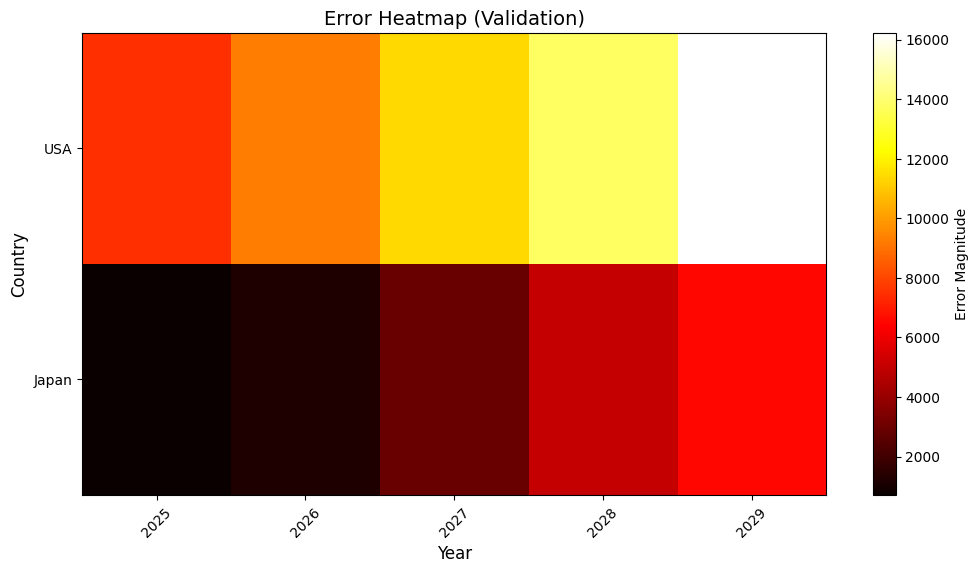

In [7]:
# Error Heatmap
error_data = predictions.copy()
error_data['USA_Error'] = abs(error_data['USA_Actual'] - error_data[['USA_LR', 'USA_Poly', 'USA_ARIMA', 'USA_RF']].mean(axis=1))
error_data['Japan_Error'] = abs(error_data['Japan_Actual'] - error_data[['Japan_LR', 'Japan_Poly', 'Japan_ARIMA', 'Japan_RF']].mean(axis=1))
plt.figure(figsize=(12, 6))
plt.imshow(error_data[['USA_Error', 'Japan_Error']].T, cmap='hot', interpolation='nearest', aspect='auto')
plt.colorbar(label='Error Magnitude')
plt.yticks([0, 1], ['USA', 'Japan'])
plt.xticks(range(len(valid_data['Year'])), valid_data['Year'], rotation=45)
plt.title('Error Heatmap (Validation)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()
